<a href="https://colab.research.google.com/github/haritoilya/haritoilya.github.io/blob/main/Diploma_20230309.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Загружаем библиотеки

import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib as plt
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
from matplotlib import pyplot
from collections import Counter

**1. Загружаем DataSet обучающей (Train) и тестовой (Test) выборки**

In [ ]:
# Сначала загружаем нужные нам файлы из Google Drive в корневую директорию Colab
# Это делается для того, чтобы Colab быстрее производил обучение
# Скорость чтения и обработки информации непосредственно с Colab может увеличивать скорость в 1000 раз

!cp /content/drive/MyDrive/Diploma_TUSUR/NSL_KDD_Test.txt /content/NSL_KDD_Test.txt
!cp /content/drive/MyDrive/Diploma_TUSUR/NSL_KDD_Train.txt /content/NSL_KDD_Train.txt

In [ ]:
# Создаём функции для дальнейшей обработки загруженных файлов

train_url = '/content/NSL_KDD_Train.txt'
test_url = '/content/NSL_KDD_Test.txt'

**2. Добавляем наименования колонок для обучающей и тестовой таблиц и проводим проверку количества строк и столбцов**

In [ ]:
# Поскольку изначально названия колонок в неудобном для нас формате, то удаляем начальные шапки из файлов
# Назначаем новые названия колонок в более удобном виде

col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
             "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
             "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login",
             "is_guest_login","count_n","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
             "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
             "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
             "class_yes_no","class_attack","difficulty"]

df_train = pd.read_csv(train_url,header=None, names = col_names)
df_test = pd.read_csv(test_url, header=None, names = col_names)

# Проверяем на содержание и корректность количества строк и колонок в выборках

print('Dimensions of the Train set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Train set: (125973, 44)
Dimensions of the Test set: (22544, 44)


**3. Выводим на экран исходные таблицы и проверяем, корректно ли отражены все колонки и выборочно данные**

In [ ]:
# Проверяем и выводим на экран данные из обучающей (Train) выборки

df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_yes_no,class_attack,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,normal,21


In [ ]:
# Проверяем и выводим на экран данные из тестовой (Test) выборки

df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_yes_no,class_attack,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1,mscan,11


**4. Объединяем таблицы Train и Test для проверки корреляций, уникальности данных, иных свойств выборки**

In [ ]:
# Объединяем однородные таблицы и проверяем получившееся количество строк и колонок

df_joined = pd.concat([df_train, df_test], axis=0)
print(df_joined.shape)

df_joined.head()

(148517, 44)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_yes_no,class_attack,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,normal,21


**5. По результатам анализа корреляций между атрибутами, были выбраны 14 атрибутов для дальнейшей работы**

In [ ]:
# Вне платформы были проведены работы по выявлению корреляций
# По результатам корреляции и в целях упрощения модели для Диплома были выбраны атрибуты,
# влияющие на обучение нейронной сети в наибольшей степени

# Соответственно выбираем и строим таблицу, с которой будем работать при обучении нейронной сети

df_joined_14 = df_joined.iloc[:, [2,3,11,22,24,26,28,29,30,31,32,34,41,42]]

# Как подсказки, выводим в комментарии индексы нужных нам колонок

# service - 2
# flag - 3
# logged_in - 11
# count_n - 22
# serror_rate - 24
# rerror_rate - 26
# same_srv_rate - 28
# diff_srv_rate - 29
# srv_diff_host_rate - 30
# dst_host_count - 31
# dst_host_srv_count - 32
# dst_host_diff_srv_rate - 34
# class_yes_no - 41
# class_attack - 42

df_joined_14.to_csv('Ready_Data_All.csv', index=False)
df_joined_14.to_csv('/content/drive/MyDrive/Diploma_TUSUR/Ready_Data_All.csv', index=False)

print(df_joined.shape)
df_joined_14.head()

(148517, 44)


,service,flag,logged_in,count_n,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,class_yes_no,class_attack
0,ftp_data,SF,0,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0,normal
1,other,SF,0,13,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0,normal
2,private,S0,0,123,1.0,0.0,0.05,0.07,0.00,255,26,0.05,1,neptune
3,http,SF,1,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0,normal
4,http,SF,1,30,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0,normal


**6. Определяем типы данных, содержащихся в выборке для дальнейшей нормализации для модели обучения**

In [ ]:
# Вспомогательно, выводим на экран типы данных, содаржащихся в каждой колонке

df_joined_14.dtypes

service                    object
flag                       object
logged_in                   int64
count_n                     int64
serror_rate               float64
rerror_rate               float64
same_srv_rate             float64
diff_srv_rate             float64
srv_diff_host_rate        float64
dst_host_count              int64
dst_host_srv_count          int64
dst_host_diff_srv_rate    float64
class_yes_no                int64
class_attack               object
dtype: object

In [ ]:
# Как видно, выборка содержит текстовые данные, которые необходимо 
# перевести в цифровое значение для осуществления обучения нейронной сети.

**7. Считаем количество уникальных значений в каждом ряду данных для дальнейшей нормализации**

In [ ]:
# Выводим количество уникальных значений обучающей выборки для дальнейшей нормализации

print("Количество уникальных значений в:")
count2 = df_joined_14.service.unique().size
print("- service: "+ str(count2))
count3 = df_joined_14.flag.unique().size
print("- flag: "+ str(count3))
count11 = df_joined_14.logged_in.unique().size
print("- logged_in: "+ str(count11))
count22 = df_joined_14.count_n.unique().size
print("- count_n: "+ str(count22))
count24 = df_joined_14.serror_rate.unique().size
print("- serror_rate: "+ str(count24))
count26 = df_joined_14.rerror_rate.unique().size
print("- rerror_rate: "+ str(count26))
count28 = df_joined_14.same_srv_rate.unique().size
print("- same_srv_rate: "+ str(count28))
count29 = df_joined_14.diff_srv_rate.unique().size
print("- diff_srv_rate: "+ str(count29))
count30 = df_joined_14.srv_diff_host_rate.unique().size
print("- srv_diff_host_rate: "+ str(count30))
count31 = df_joined_14.dst_host_count.unique().size
print("- dst_host_count: "+ str(count31))
count32 = df_joined_14.dst_host_srv_count.unique().size
print("- dst_host_srv_count: "+ str(count32))
count34 = df_joined_14.dst_host_diff_srv_rate.unique().size
print("- dst_host_diff_srv_rate: "+ str(count34))
count41 = df_joined_14.class_yes_no.unique().size
print("- class_yes_no: "+ str(count41))
count42 = df_joined_14.class_attack.unique().size
print("- class_attack: "+ str(count42))

Количество уникальных значений в:
- service: 70
- flag: 11
- logged_in: 2
- count_n: 512
- serror_rate: 99
- rerror_rate: 98
- same_srv_rate: 101
- diff_srv_rate: 101
- srv_diff_host_rate: 87
- dst_host_count: 256
- dst_host_srv_count: 256
- dst_host_diff_srv_rate: 101
- class_yes_no: 2
- class_attack: 40


**8. Производим нормализацию данных выборки для обучения нейронной сети**

In [ ]:
# Нормализуем значения в таблице для применения обучении нейронной сети
# Для нормализации используем следующую библиотеку

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

df_joined_14_enc = df_joined_14.apply(LabelEncoder().fit_transform)

# Для облегчения и ускорения дальнейшей работы нейронной сети создаём новый файл 
# с новой структурой нормализованных данных

df_joined_14_enc.to_csv('Ready_Data_Norm.csv', index=False)
df_joined_14_enc.to_csv('/content/drive/MyDrive/Diploma_TUSUR/Ready_Data_Norm.csv', index=False)

print(df_joined_14_enc.shape)
df_joined_14_enc.head()

(148517, 14)


,service,flag,logged_in,count_n,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,class_yes_no,class_attack
0,20,9,0,2,0,0,100,0,0,150,25,3,0,16
1,44,9,0,13,0,0,8,15,0,255,1,60,0,16
2,49,5,0,123,98,0,5,7,0,255,26,5,1,14
3,24,9,1,5,20,0,100,0,0,30,255,0,0,16
4,24,9,1,30,0,0,100,0,9,255,255,0,0,16


**9. Разделение данных на входной и исходящий слои Многослойного персептрона**

In [ ]:
# Теперь готовим данные для обучения модели: определяем ВХОДНОЙ слой

print(df_joined_14_enc.shape)
df_joined_14_enc.iloc[:, :-2].head()

(148517, 14)


,service,flag,logged_in,count_n,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate
0,20,9,0,2,0,0,100,0,0,150,25,3
1,44,9,0,13,0,0,8,15,0,255,1,60
2,49,5,0,123,98,0,5,7,0,255,26,5
3,24,9,1,5,20,0,100,0,0,30,255,0
4,24,9,1,30,0,0,100,0,9,255,255,0


In [ ]:
# Определяем ВЫХОДНОЙ слой

df_joined_14_enc.iloc[:, -2].head()

0    0
1    0
2    1
3    0
4    0
Name: class_yes_no, dtype: int64

**10. Модель Многослойного персептрона методом обратного распространения ошибки**

In [ ]:
# Строим модель Многослойного персептрона с применением метода обратного распространения ошибки

import tensorflow as tf
from tensorflow import keras

# Определяем количество входных, скрытых и выходных слоёв и входящих в них нейронов
num_inputs = 12
num_hidden_layers = 5
num_hidden_nodes = 24
num_outputs = 1

# Определяем архитектуру модели
model = keras.Sequential()

# Включем входной слой
model.add(keras.layers.InputLayer(input_shape=(num_inputs,)))

# Включаем скрытые слои
for _ in range(num_hidden_layers):
    model.add(keras.layers.Dense(num_hidden_nodes, activation='relu'))

# Включаем выходной слой
model.add(keras.layers.Dense(num_outputs, activation='sigmoid'))

# Компилируем модель
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Выводим на экран итоговую модель
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 24)                312       
                                                                 
 dense_31 (Dense)            (None, 24)                600       
                                                                 
 dense_32 (Dense)            (None, 24)                600       
                                                                 
 dense_33 (Dense)            (None, 24)                600       
                                                                 
 dense_34 (Dense)            (None, 24)                600       
                                                                 
 dense_35 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,737
Trainable params: 2,737
Non-traina

**11. Проводим обучение модели нейронной сети**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделяем выборку на ВХОДНОЙ и ВЫХОДНОЙ слои
X = df_joined_14_enc.iloc[:, :-2].values
y = df_joined_14_enc.iloc[:, -2].values.reshape(-1, 1)

# Разделяем выборку на ОБУЧАЮЩУЮ и ТЕСТОВУЮ части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Осуществляем предпроцессинг входного слоя
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель "Многослойный персептрон методом обратного распространения ошибки"
import time

# Включаем расчёт времени проведения обучения
start_time = time.time()

# Определяем количество обучающих эпох
# Определяем параметры графика 
epochs_n = 100
accs = []
losses = []
val_accs = []
val_loss = []

for epoch in range(1, epochs_n+1):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))
    
    accs.append(history.history['accuracy'])
    val_accs.append(history.history['val_accuracy'])
    losses.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])

# Осуществляем расчёт времени до окончания обучения 
    remaining_epochs = epochs_n - epoch
    elapsed_time = time.time() - start_time
    time_per_epoch = elapsed_time / epoch
    remaining_time = time_per_epoch * remaining_epochs
    print(f"Эпоха {epoch}/{epochs_n}: {int(remaining_time // 60)} минут, {int(remaining_time % 60)} секунд осталось")

# Фиксируем итоговое суммарное время осуществления обучения
end_time = time.time()
total_time = end_time - start_time
print(f"Итого фактическое время обучения: {int(total_time // 60)} минут, {int(total_time % 60)} секунд")

3713/3713 [==============================] - 10s 2ms/step - loss: 0.1673 - accuracy: 0.9347 - val_loss: 0.1348 - val_accuracy: 0.9499
Эпоха 1/100: 16 минут, 25 секунд осталось
3713/3713 [==============================] - 8s 2ms/step - loss: 0.1253 - accuracy: 0.9526 - val_loss: 0.1228 - val_accuracy: 0.9502
Эпоха 2/100: 14 минут, 56 секунд осталось
3713/3713 [==============================] - 8s 2ms/step - loss: 0.1082 - accuracy: 0.9593 - val_loss: 0.1018 - val_accuracy: 0.9628
Эпоха 3/100: 14 минут, 23 секунд осталось
3713/3713 [==============================] - 8s 2ms/step - loss: 0.1014 - accuracy: 0.9617 - val_loss: 0.1094 - val_accuracy: 0.9574
Эпоха 4/100: 14 минут, 15 секунд осталось
3713/3713 [==============================] - 8s 2ms/step - loss: 0.0950 - accuracy: 0.9638 - val_loss: 0.0955 - val_accuracy: 0.9650
Эпоха 5/100: 13 минут, 58 секунд осталось
3713/3713 [==============================] - 9s 2ms/step - loss: 0.0908 - accuracy: 0.9653 - val_loss: 0.0910 - val_accuracy

**12. Строим графики сходимости модели, а именно целевых и предсказанных значений**

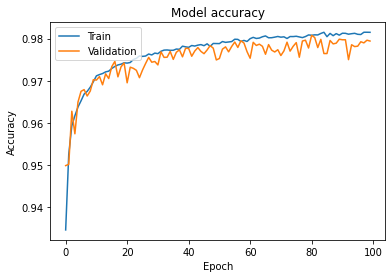

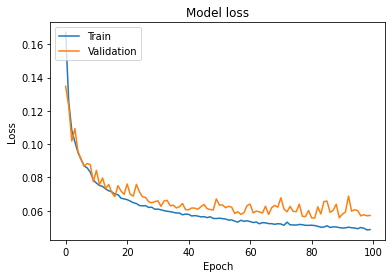

In [ ]:
import matplotlib.pyplot as plt

# Строим графики обучения обучаемой и тестируемой (валидационной) выборки

# График аккуратности модели
plt.plot(accs)
plt.plot(val_accs)
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

# График ошибок
plt.plot(losses)
plt.plot(val_loss)
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Loss.png')
plt.show()

**13. Сохраняем файлы обучения на локальном Colab и GoogleDrive (для случая отключения сеанса)**

In [2]:
# Подключаем Google Drive для сохранения данных обучения
from google.colab import drive
drive.mount('/content/drive')

# Используем обученную модель для предсказания для любой подгруженной тестовой выборки
y_train_pred = model.predict(X)

# Сохраняем в файлы обученную модель для дальнейшего использования в 2-х форматах

# в txt формате в Colab и Google Drive
np.savetxt('/content/Train_Predictions.csv', np.hstack((y.reshape(-1,1), y_train_pred.reshape(-1,1))), delimiter=',')
np.savetxt('/content/drive/MyDrive/Diploma_TUSUR/Train_Predictions.csv', np.hstack((y.reshape(-1,1), y_train_pred.reshape(-1,1))), delimiter=',')

# в h5 формате в Colab и Google Drive
model.save('/content/Train_Predictions.h5')
model.save('/content/drive/MyDrive/Diploma_TUSUR/Train_Predictions.h5')

# Используем обученную модель для предсказания для любой подгруженной тестовой выборки
y_test_pred = model.predict(X_test)

# Сохраняем результаты прогонки тестовой выборки с целью предсказания
np.savetxt('/content/Test_Predictions.csv', np.hstack((y_test.reshape(-1,1), y_test_pred.reshape(-1,1))), delimiter=',')
np.savetxt('/content/drive/MyDrive/Diploma_TUSUR/Test_Predictions.csv', np.hstack((y_test.reshape(-1,1), y_test_pred.reshape(-1,1))), delimiter=',')

# Подгрузка и открытие сохраненных данных прогонки тестовой выборки
test_results = np.loadtxt('/content/Test_Predictions.csv', delimiter=',')

Mounted at /content/drive


NameError: ignored

**14. Симулируем случайные события для проверки модели (случайное число строк из диапазона всей выборки)**

In [7]:
import pandas as pd
import random

# Подключаем функцию генератора случайных чисел в диапазоне заданных значений
n_rows = random.randint(7, 26)

# Поскольку выборки без заглавий, определяем названия колонок
columns = ['service', 'flag', 'logged_in', 'count_n', 'serror_rate', 'rerror_rate', 
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 
           'dst_host_srv_count', 'dst_host_diff_srv_rate', 'class_yes_no', 'class_attack']

# Colab по истечении определенного времени или призавершении сеанса
# удаляет все файлы. Для этого необходимо подстраховаться и в ходе выполнения 
# программы сохранять и подгружать данные на/из Google Drive

# Подгружаем необходимые нам данные из Google Drive в Colab
!cp /content/drive/MyDrive/Diploma_TUSUR/Ready_Data_All.csv /content/Ready_Data_All.csv

# Читаем данные из файла и вытаскиваем из файла строки случайным образом 
df_random_rows = pd.read_csv('Ready_Data_All.csv', names=columns, skiprows=1).sample(n=n_rows)
df_random_rows.reset_index(drop=True, inplace=True)

# Сохраняем строки с названиями колонок в новый файл и в Google Drive, и в Colab
df_random_rows.to_csv('/content/Template_Random_Rows.txt', index=False)
df_random_rows.to_csv('/content/drive/MyDrive/Diploma_TUSUR/Template_Random_Rows.txt', index=False)

# Выводим на экран количество строки колонок в выборе
print(df_random_rows.shape)

# Выводим на экран результат выбора
df_random_rows.head()

(9, 14)


,service,flag,logged_in,count_n,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,class_yes_no,class_attack
0,smtp,SF,1,1,0.0,0.0,1.0,0.00,1.0,255,18,0.02,0,normal
1,private,S0,0,156,1.0,0.0,0.1,0.06,0.0,255,5,0.09,1,neptune
2,ecr_i,SF,0,481,0.0,0.0,1.0,0.00,0.0,63,63,0.00,1,smurf
3,telnet,RSTO,0,1,0.0,1.0,1.0,0.00,0.0,224,21,0.02,0,normal
4,http,RSTR,1,11,0.0,1.0,1.0,0.00,0.0,255,244,0.01,1,apache2


**15. Нормализуем данные по случайно созданным таблицам данных и сохраняем в новые таблицы**

In [8]:
# Нормализуем значения в таблице для применения обучении нейронной сети
# Для нормализации используем следующую библиотеку
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

df_random_rows_norm = df_random_rows.apply(LabelEncoder().fit_transform)

# Нормализованные данные сохраняем в тот же файл - перезаписываем
df_random_rows_norm.to_csv('/content/Template_Random_Rows.txt', index=False)
df_random_rows_norm.to_csv('/content/drive/MyDrive/Diploma_TUSUR/Template_Random_Rows.txt', index=False)

print(df_random_rows_norm.shape)
df_random_rows_norm.head()

(9, 14)


,service,flag,logged_in,count_n,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,class_yes_no,class_attack
0,4,3,1,0,0,0,4,0,1,2,3,2,0,3
1,3,2,0,5,1,0,2,2,0,2,0,5,1,2
2,1,3,0,7,0,0,4,0,0,0,6,0,1,5
3,5,0,0,0,0,2,4,0,0,1,4,2,0,3
4,2,1,1,2,0,2,4,0,0,2,7,1,1,0


In [9]:
# ВОПРОС, нужен ли этот раздел??? 

test_real_url_rows = '/content/Template_Random_Rows.txt'


col_names_real_rows = ["service","flag","logged_in","count_n","serror_rate",	
                  "rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",	
                  "dst_host_count","dst_host_srv_count","dst_host_diff_srv_rate",
                  "class_yes_no", "class_attack"]

df_test_real_rows = pd.read_csv(test_real_url_rows,header=None, names = col_names_real_rows)

print('Dimensions of the Train set:',df_test_real_rows.shape)
df_test_real_rows.head()

Dimensions of the Train set: (10, 14)


,service,flag,logged_in,count_n,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,class_yes_no,class_attack
0,service,flag,logged_in,count_n,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,class_yes_no,class_attack
1,4,3,1,0,0,0,4,0,1,2,3,2,0,3
2,3,2,0,5,1,0,2,2,0,2,0,5,1,2
3,1,3,0,7,0,0,4,0,0,0,6,0,1,5
4,5,0,0,0,0,2,4,0,0,1,4,2,0,3


**16. Загружаем сохраненные файлы для прогонки через обученную нейронную сетку и выгружаем полученные результаты**

In [10]:
import numpy as np
import pandas as pd
from keras.models import load_model

# Подгружаем необходимые нам данные из Google Drive в Colab
!cp /content/drive/MyDrive/Diploma_TUSUR/Train_Predictions.h5 /content/Train_Predictions.h5

# Подгружаем обученную модель в формате h5
model = load_model('Train_Predictions.h5')

# Подгружаем сгенерированную случайным образом тестовую модель
test_real_rows = pd.read_csv('/content/Template_Random_Rows.txt')

# Выбираем у нее ВХОДНОЙ и ВЫХОДНОЙ слои
X_test_real_rows = test_real_rows.iloc[:, :-2].values
y_test_real_rows = test_real_rows.iloc[:, -2].values.reshape(-1, 1)

# Осуществляем прогнозирование по тестовой выборке
y_pred = model.predict(X_test_real_rows)

# Сохраняем результаты предсказания по тестовой выборке в файлы
np.savetxt('/content/Pred_Random_Rows.csv', np.hstack((y_test_real_rows, y_pred)), delimiter=',', header='y_test_real,y_pred', comments='')
np.savetxt('/content/drive/MyDrive/Diploma_TUSUR/Pred_Random_Rows.csv', np.hstack((y_test_real_rows, y_pred)), delimiter=',', header='y_test_real,y_pred', comments='')

1/1 [==============================] - 0s 335ms/step


**17. Проверяем, что в итоге получилось, какие события нормальные, какие аномальные**

In [11]:
import pandas as pd

# Подгружаем необходимые нам данные из Google Drive в Colab
!cp /content/drive/MyDrive/Diploma_TUSUR/Pred_Random_Rows.csv /content/Pred_Random_Rows.csv
test_results_url_rows = '/content/Pred_Random_Rows.csv'

# Назначаем временные названия колонкам
column_names = ["Test ID", "Result"]

# В илу возникающей ошибки отражения NaN в строке с названием колонок, 
# пропускаем первую строку
df_test_results_rows = pd.read_csv(test_results_url_rows, names=column_names, skiprows=1).dropna()

# Создаем колонку "Status", где будем выводить значение аномалия или нет
# Точно так же тут отражаем данные в экспоненциальной форме в виде обычной дроби
df_test_results_rows = df_test_results_rows.apply(lambda x: pd.to_numeric(x, errors='coerce').astype('float'))

# Создаём условия для вывода одного из 3-х значений: Аномалия, Нормально, Проверить.
# В ходе тестирования модели обнаружилось, что по некоторым события срабатывает
# False Positive(FP) ошибка, то есть когда действительная аномалия после прогонки 
# через обученную модель распознаётся как нормальная. Для этого вводим такое
# дополнительное свойство как Check/Проверить для дополнительного контроля
df_test_results_rows["Status"] = df_test_results_rows.apply(lambda x: "Check" if x["Test ID"] - x["Result"] == 1 else "Anomaly" if x["Result"] == 1 else "Normal", axis=1)


# Возникла проблема сохранения данных String в файлы.
# Для этого выделяем только целую часть числа и меняем тип данных со "str" на "int"
df_test_results_rows["Test ID Integer"] = df_test_results_rows["Test ID"].astype(str).str.extract('(\d+)', expand=False).astype(int)
df_test_results_rows["Result Integer"] = df_test_results_rows["Result"].astype(str).str.extract('(\d+)', expand=False).astype(int)

# В связи с некорректным выделением целого числа у экспоненциальных чисел
# относим к нулю все числа, которые оказались больше 1.
df_test_results_rows.loc[df_test_results_rows["Result Integer"] > 1, "Result Integer"] = 0

# Адаляем все колонки с оставшимися типами файлов String для корректного
# сохранения данных в файл. Выбираем нужные нам колонки в нужном порядке
df_final_result = df_test_results_rows.drop(columns=["Test ID", "Result"])
df_final_result = df_final_result.iloc[:, [1,2,0]]

print('Dimensions of the Testing set:', df_final_result.shape)
df_final_result.head()

Dimensions of the Testing set: (9, 3)


,Test ID Integer,Result Integer,Status
0,0,0,Normal
1,1,1,Anomaly
2,1,1,Check
3,0,1,Anomaly
4,1,1,Check


In [14]:
import pandas as pd

# Теперь объединяем исходные ненормированные строки тестируемых событий,
# подаваемые как ВХОДНОЙ сигнал в том виде, в котором ее должен видеть 
# работник подразделения информационной безопасности,
# и ВЫХОДНЫЕ данные в виде результата: Аномалия, Нормально, Проверить
df1_rows = df_random_rows.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]
df2_rows = df_final_result.iloc[:, [2]]

# Используем для этого команду pd.concat
df_merged_rows = pd.concat([df1_rows, df2_rows], axis=1)

# Окрашиваем строки содержащие Аномалии, Нормальные и Проверочные значения
# в цвета светофора (красный, зеленый, желтый соответственно)
def color_anomaly(row):
    
    # Takes a pandas Series object and returns a list of css style strings with
    # the property 'background-color: pink' for anomalies, white otherwise.

    if row['Status'] == 'Anomaly':
        return ['background-color: rgb(255, 225, 225)'] * len(row)
    elif row['Status'] == 'Check':
        return ['background-color: rgb(255, 255, 153)'] * len(row)
    else:
        return ['background-color: rgb(205, 255, 155)'] * len(row)

print('Dimensions of the Testing set:', df_merged_rows.shape)

anomaly_count = len(df_merged_rows[df_merged_rows['Status'] == 'Anomaly'])
check_count = len(df_merged_rows[df_merged_rows['Status'] == 'Check'])
normal_count = len(df_merged_rows[df_merged_rows['Status'] == 'Normal'])

print('Кол-во Anomaly:', anomaly_count)
print('Кол-во Check:', check_count)
print('Кол-во Normal:', normal_count)

# Создаём функцию стилизованности с раскраской всей таблицы
styled_df = df_merged_rows.style.apply(color_anomaly, axis=1)

# Отображаем результат на экране
styled_df

Dimensions of the Testing set: (9, 13)
Кол-во Anomaly: 5
Кол-во Check: 3
Кол-во Normal: 1


,service,flag,logged_in,count_n,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,Status
0,smtp,SF,1,1,0.000000,0.000000,1.000000,0.000000,1.000000,255,18,0.020000,Normal
1,private,S0,0,156,1.000000,0.000000,0.100000,0.060000,0.000000,255,5,0.090000,Anomaly
2,ecr_i,SF,0,481,0.000000,0.000000,1.000000,0.000000,0.000000,63,63,0.000000,Check
3,telnet,RSTO,0,1,0.000000,1.000000,1.000000,0.000000,0.000000,224,21,0.020000,Anomaly
4,http,RSTR,1,11,0.000000,1.000000,1.000000,0.000000,0.000000,255,244,0.010000,Check
5,http,RSTR,1,2,0.000000,0.500000,1.000000,0.000000,0.000000,255,253,0.010000,Check
6,csnet_ns,S0,0,267,1.000000,0.000000,0.080000,0.040000,0.000000,255,22,0.050000,Anomaly
7,private,S0,0,122,1.000000,0.000000,0.030000,0.070000,0.000000,255,14,0.060000,Anomaly
8,private,SF,0,31,0.000000,0.000000,0.320000,0.100000,0.000000,255,10,0.870000,Anomaly


**РАБОТА С БЭКЕНДОМ ЗАВЕРШЕНА! НЕОБХОДИМО ВНЕДРЕНИЕ ФРОНТЕНДА С ПОДВЯЗКОЙ СООТВЕТСТВУЮЩИХ МОДУЛЕЙ**

На отработку бэкенда ушло время с 25.02.2023 по 09.03.2023,
то есть 13 дней.